# First look at the data

In [82]:
%matplotlib inline
import numpy as np
from utils.helper import read_data, blur, to_real, morphology
import utils.processing as processing
import matplotlib.pyplot as plt
FOLDER = "data/"
NUMBER_FO_FRAMES = 5
NUMBER_OF_RADARS = 3

## Import data

In [2]:
data_empty = read_data(FOLDER + "empty.csv")
data_1p = read_data(FOLDER + "1p.csv")
data_2p = read_data(FOLDER + "2p.csv")
data_3p = read_data(FOLDER + "3p.csv")

In [3]:
data_empty.shape

(40, 5, 3, 64, 64)

In [184]:
TIME = 38

## Take 1 second and average over the time and frames

In [204]:
data_empty_2s = np.sum(data_empty[TIME:TIME+1,:,:,:,:], axis=0)
print(data_empty_2s.shape)
data_empty_2s_avg_frame = np.sum(data_empty_2s, axis=0)
print(data_empty_2s_avg_frame.shape)

data_1p_2s = np.sum(data_1p[TIME:TIME+1,:,:,:,:], axis=0)
data_1p_2s_avg_frame = np.sum(data_1p_2s, axis=0)

data_2p_2s = np.sum(data_2p[TIME:TIME+1,:,:,:,:], axis=0)
data_2p_2s_avg_frame = np.sum(data_2p_2s, axis=0)

data_3p_2s = np.sum(data_3p[TIME:TIME+1,:,:,:,:], axis=0)
data_3p_2s_avg_frame = np.sum(data_3p_2s, axis=0)

(5, 3, 64, 64)
(3, 64, 64)


In [186]:
# Eraese line for static objects
data_empty[:,:,:,32,:] = 0
# Mean for 
data_empty_mean = np.mean(data_empty[TIME:TIME+1,:,:,:,:], axis=0)
# Mean for
data_empty_mean_frame = np.mean(data_empty_mean, axis=0)

data_1p[:,:,:,32,:] = 0
data_1p_mean = np.mean(data_1p[TIME:TIME+1,:,:,:,:], axis=0)
data_1p_mean_frame = np.mean(data_1p_mean, axis=0)

data_2p[:,:,:,32,:] = 0
data_2p_mean = np.mean(data_2p[TIME:TIME+1,:,:,:,:], axis=0)
data_2p_mean_frame = np.mean(data_2p_mean, axis=0)

data_3p[:,:,:,32,:] = 0
data_3p_mean = np.mean(data_3p[TIME:TIME+1,:,:,:,:], axis=0)
data_3p_mean_frame = np.mean(data_3p_mean, axis=0)

# print(data_3p_mean_frame.shape)
# print(data_3p_mean_frame_expended.shape)

### Blur data

In [187]:
data_empty_mean_frame_blur = morphology(np.abs(np.expand_dims(data_empty_mean_frame, axis=0))).squeeze()

data_1p_mean_frame_blur = morphology(np.abs(np.expand_dims(data_1p_mean_frame, axis=0))).squeeze()

data_2p_mean_frame_blur = morphology(np.abs(np.expand_dims(data_2p_mean_frame, axis=0))).squeeze()

data_3p_mean_frame_blur = morphology(np.abs(np.expand_dims(data_3p_mean_frame, axis=0))).squeeze()

## Old version
# data_3p_mean_frame_expended = np.expand_dims(data_3p_mean_frame, axis=0)
# # data_3p_mean_frame_blur = blur(to_real(data_3p_mean_frame_expended))
# data_3p_mean_frame_blur = blur(np.abs(data_3p_mean_frame_expended))

In [188]:
THRESHOLD = 0.8

### Sum  THRESHOLDed data from all sensors

In [189]:
data_empty_mean_frame_blur_sum = np.sum(data_empty_mean_frame_blur > THRESHOLD, axis=0)
data_1p_mean_frame_blur_sum = np.sum(data_1p_mean_frame_blur > THRESHOLD, axis=0)
data_2p_mean_frame_blur_sum = np.sum(data_2p_mean_frame_blur > THRESHOLD, axis=0)
data_3p_mean_frame_blur_sum = np.sum(data_3p_mean_frame_blur > THRESHOLD, axis=0)
# print(data_3p_mean_frame_blur_sum.shape)

## Empty

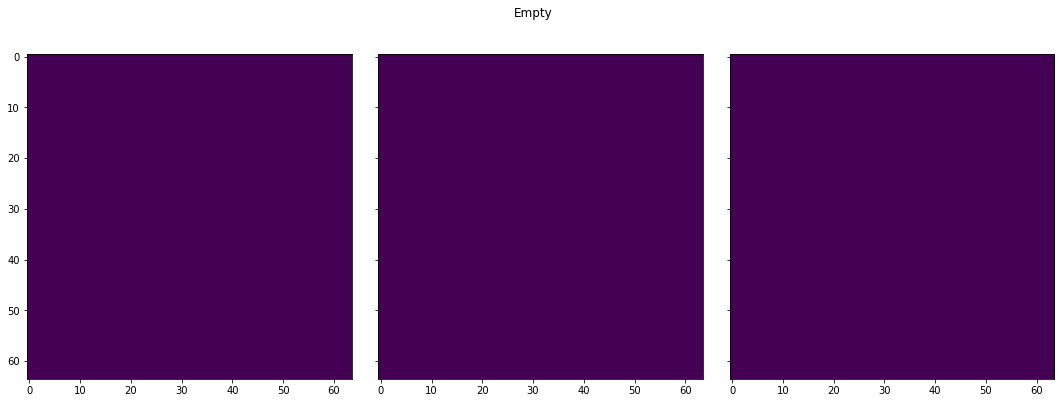

In [190]:
fig, axs = plt.subplots(
    1, NUMBER_OF_RADARS, figsize=(15, 10), sharex=True, sharey=True
)
fig.tight_layout()
fig.suptitle("Empty", y = 0.8)
for i in range(NUMBER_OF_RADARS):
    axs[i].imshow(np.abs(data_empty_2s_avg_frame)[i, :, :]> THRESHOLD) 
    axs[i].set_aspect("equal")


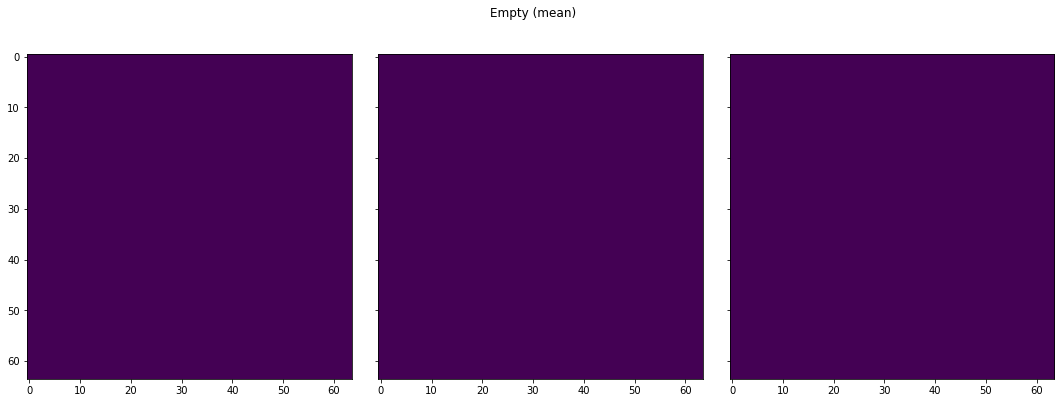

In [191]:
fig, axs = plt.subplots(
    1, NUMBER_OF_RADARS, figsize=(15, 10), sharex=True, sharey=True
)
fig.tight_layout()
fig.suptitle("Empty (mean)", y = 0.8)
for i in range(NUMBER_OF_RADARS):
    axs[i].imshow(np.abs(data_empty_mean_frame)[i, :, :]> THRESHOLD) 
    axs[i].set_aspect("equal")

## One person

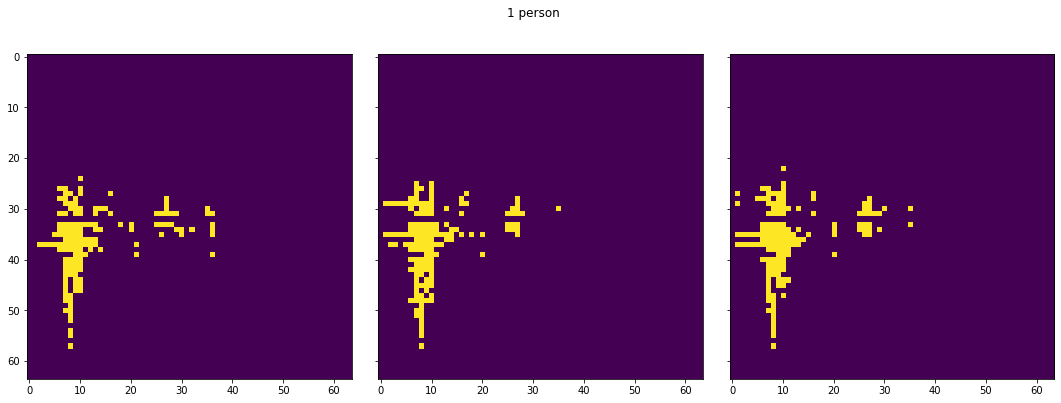

In [192]:
fig, axs = plt.subplots(
    1, NUMBER_OF_RADARS, figsize=(15, 10), sharex=True, sharey=True
)
fig.tight_layout()
fig.suptitle("1 person", y = 0.8)
for i in range(NUMBER_OF_RADARS):
    axs[i].imshow(np.abs(data_1p_2s_avg_frame)[i, :, :]>THRESHOLD)
    axs[i].set_aspect("equal")

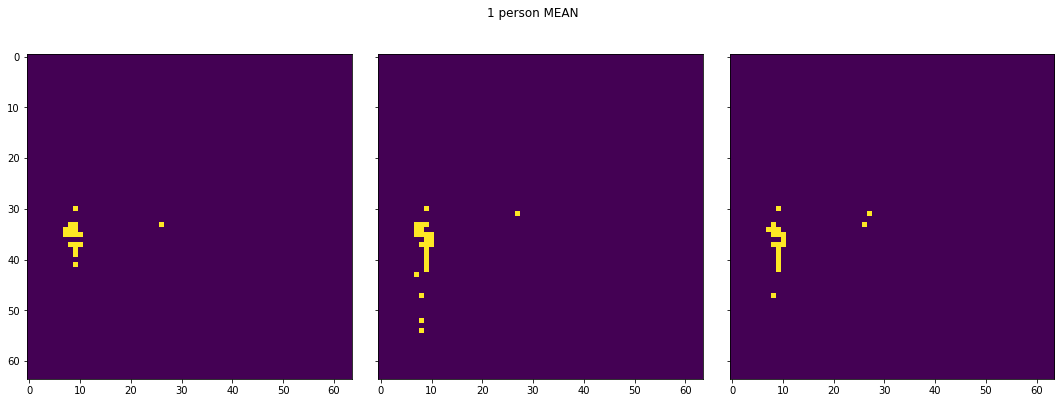

In [193]:
fig, axs = plt.subplots(
    1, NUMBER_OF_RADARS, figsize=(15, 10), sharex=True, sharey=True
)
fig.tight_layout()
fig.suptitle("1 person MEAN", y = 0.8)
for i in range(NUMBER_OF_RADARS):
    axs[i].imshow(np.abs(data_1p_mean_frame)[i, :, :]>THRESHOLD)
    axs[i].set_aspect("equal")

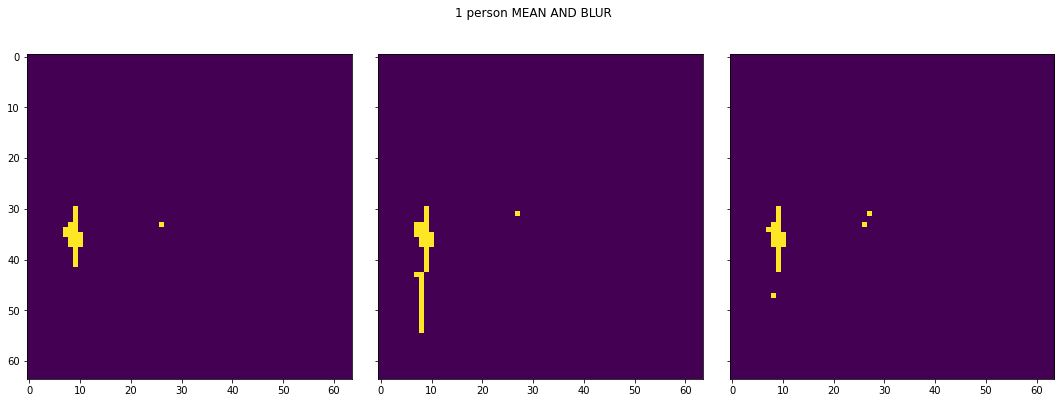

In [194]:
fig, axs = plt.subplots(
    1, NUMBER_OF_RADARS, figsize=(15, 10), sharex=True, sharey=True
)
fig.tight_layout()
fig.suptitle("1 person MEAN AND BLUR", y = 0.8)
for i in range(NUMBER_OF_RADARS):
    axs[i].imshow(np.abs(data_1p_mean_frame_blur)[i, :, :]>THRESHOLD)
    axs[i].set_aspect("equal")

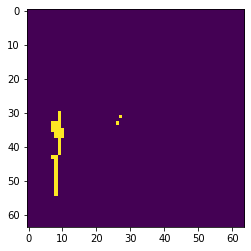

In [195]:
plt.imshow(data_1p_mean_frame_blur_sum > THRESHOLD)

## Two persons

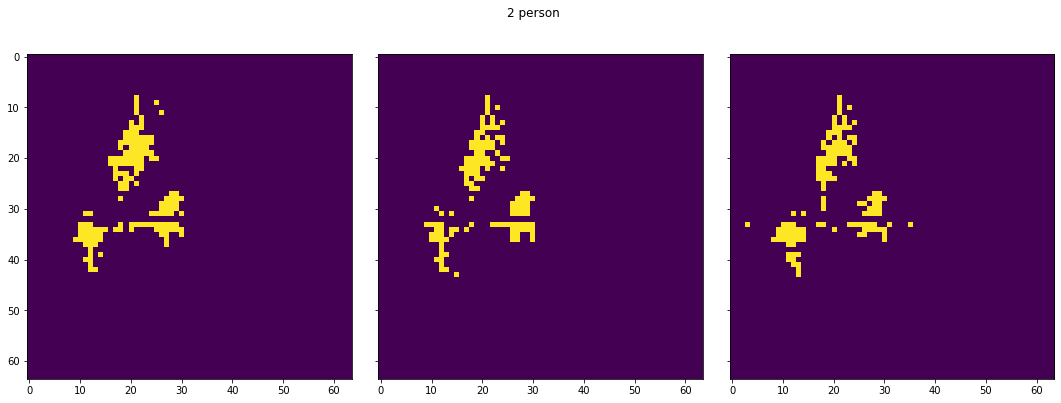

In [196]:
fig, axs = plt.subplots(
    1, NUMBER_OF_RADARS, figsize=(15, 10), sharex=True, sharey=True
)
fig.tight_layout()
fig.suptitle("2 person", y = 0.8)
for i in range(NUMBER_OF_RADARS):
    axs[i].imshow(np.abs(data_2p_2s_avg_frame)[i, :, :]>THRESHOLD)
    axs[i].set_aspect("equal")

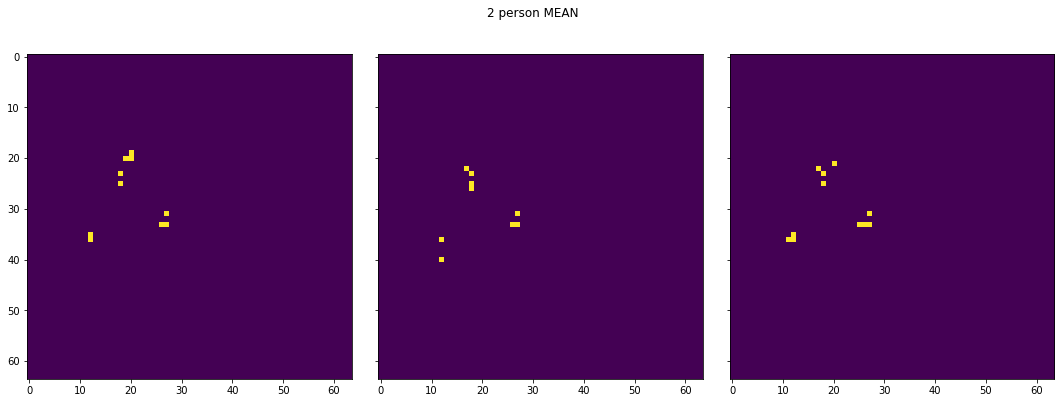

In [197]:
fig, axs = plt.subplots(
    1, NUMBER_OF_RADARS, figsize=(15, 10), sharex=True, sharey=True
)
fig.tight_layout()
fig.suptitle("2 person MEAN", y = 0.8)
for i in range(NUMBER_OF_RADARS):
    axs[i].imshow(np.abs(data_2p_mean_frame)[i, :, :]>THRESHOLD)
    axs[i].set_aspect("equal")

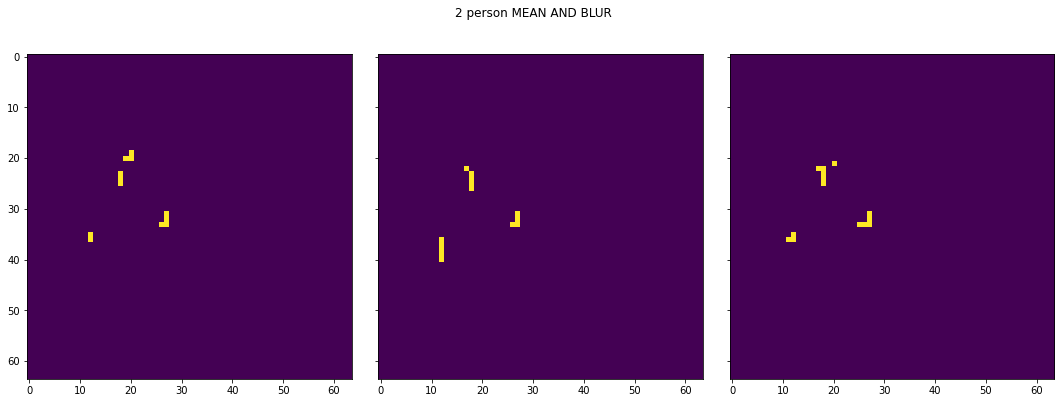

In [198]:
fig, axs = plt.subplots(
    1, NUMBER_OF_RADARS, figsize=(15, 10), sharex=True, sharey=True
)
fig.tight_layout()
fig.suptitle("2 person MEAN AND BLUR", y = 0.8)
for i in range(NUMBER_OF_RADARS):
    axs[i].imshow(np.abs(data_2p_mean_frame_blur)[i, :, :]>THRESHOLD)
    axs[i].set_aspect("equal")

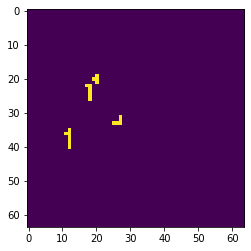

In [199]:
plt.imshow(data_2p_mean_frame_blur_sum > THRESHOLD)

## Three persons

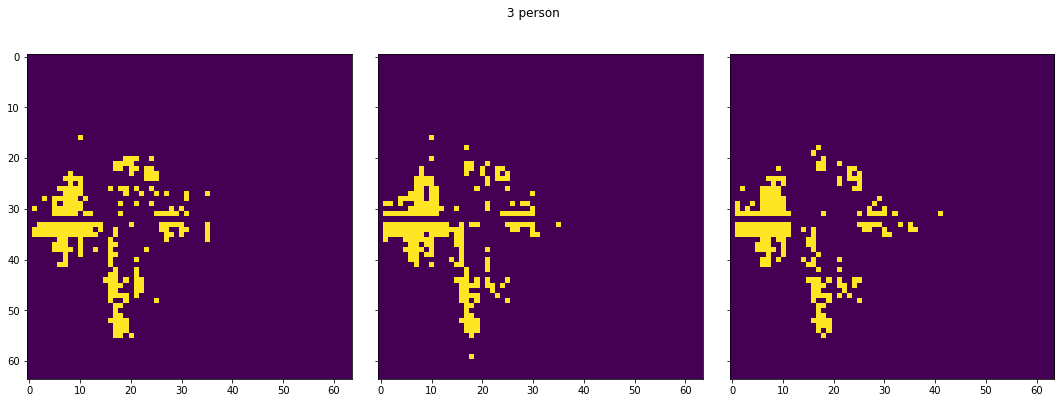

In [200]:
fig, axs = plt.subplots(
    1, NUMBER_OF_RADARS, figsize=(15, 10), sharex=True, sharey=True
)
fig.tight_layout()
fig.suptitle("3 person", y = 0.8)
for i in range(NUMBER_OF_RADARS):
    axs[i].imshow(np.abs(data_3p_2s_avg_frame)[i, :, :] > THRESHOLD)
    axs[i].set_aspect("equal")

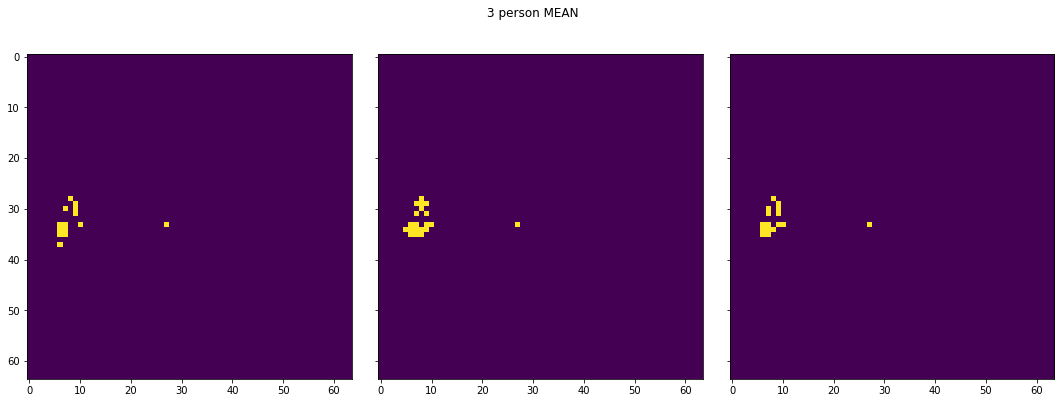

In [201]:
fig, axs = plt.subplots(
    1, NUMBER_OF_RADARS, figsize=(15, 10), sharex=True, sharey=True
)
fig.tight_layout()
fig.suptitle("3 person MEAN", y = 0.8)
for i in range(NUMBER_OF_RADARS):
    axs[i].imshow(np.abs(data_3p_mean_frame)[i, :, :] > THRESHOLD)
    axs[i].set_aspect("equal")

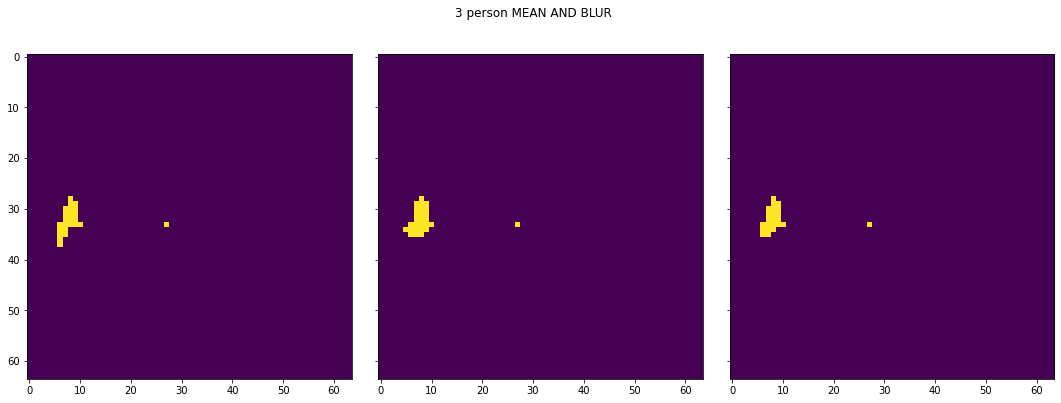

In [202]:
fig, axs = plt.subplots(
    1, NUMBER_OF_RADARS, figsize=(15, 10), sharex=True, sharey=True
)
fig.tight_layout()
fig.suptitle("3 person MEAN AND BLUR", y = 0.8)
for i in range(NUMBER_OF_RADARS):
    axs[i].imshow(np.abs(data_3p_mean_frame_blur)[i, :, :]>THRESHOLD)
    axs[i].set_aspect("equal")

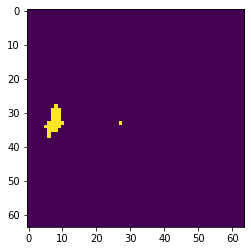

In [203]:
plt.imshow(data_3p_mean_frame_blur_sum > THRESHOLD)